<a href="https://colab.research.google.com/github/GanapriyaV/Bearing-Fault-Detection-using-Support-Vector-Classifier-SVC-/blob/main/Bearing%20Fault%20Detection%20Using%20Support%20Vector%20Classification%20(SVC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python --version
!pip --version

Python 3.12.12
pip 25.3 from /usr/local/lib/python3.12/dist-packages/pip (python 3.12)


In [ ]:
!python -m pip install scipy

In [ ]:
!python -m pip install --upgrade pip

In [ ]:
!conda install scipy -y

/bin/bash: line 1: conda: command not found


In [ ]:
!pip install scipy

In [ ]:
import os
print('Files in current directory:')
for file in os.listdir('.'):
    print(f'- {file}')

Files in current directory:
- .config
- Normal.mat
- Inner.mat
- Outer.mat
- Ball.mat
- sample_data


**Checking mat files size**

In [ ]:
import os

mat_files = ['Normal.mat', 'Inner.mat', 'Ball.mat', 'Outer.mat']

print('Checking .mat file sizes:')
for f in mat_files:
    if os.path.exists(f):
        print(f'- {f}: {os.path.getsize(f)} bytes')
    else:
        print(f'- {f}: Not found')

Checking .mat file sizes:
- Normal.mat: 3903344 bytes
- Inner.mat: 2910768 bytes
- Ball.mat: 2942112 bytes
- Outer.mat: 2928192 bytes


**Loading Data**

In [ ]:
import pandas as pd
from scipy.io import loadmat
import numpy as np
data = loadmat('Normal.mat')
print(data.keys())
data1 = loadmat('Inner.mat')
print(data1.keys())
data2 = loadmat('Ball.mat')
print(data2.keys())
data3 = loadmat('Outer.mat')
print(data3.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X097_DE_time', 'X097_FE_time', 'X097RPM'])
dict_keys(['__header__', '__version__', '__globals__', 'X105_DE_time', 'X105_FE_time', 'X105_BA_time', 'X105RPM'])
dict_keys(['__header__', '__version__', '__globals__', 'X118_DE_time', 'X118_FE_time', 'X118_BA_time', 'X118RPM'])
dict_keys(['__header__', '__version__', '__globals__', 'X130_DE_time', 'X130_FE_time', 'X130_BA_time', 'X130RPM'])


**Displaying of Columns**

In [ ]:
import pandas as pd
from scipy.io import loadmat
import numpy as np

data = loadmat('Normal.mat')
data1 = loadmat('Inner.mat')
data2 = loadmat('Ball.mat')
data3 = loadmat('Outer.mat')

de_time = data['X097_DE_time']
fe_time = data['X097_FE_time']
rpm = data['X097RPM']

de_time1 = data1['X105_DE_time']
fe_time1 = data1['X105_FE_time']
ba_time1 = data1['X105_BA_time']
rpm1 = data1['X105RPM']

de_time2 = data2['X118_DE_time']
fe_time2 = data2['X118_FE_time']
ba_time2 = data2['X118_BA_time']
rpm2 = data2['X118RPM']

de_time3 = data3['X130_DE_time']
fe_time3 = data3['X130_FE_time']
ba_time3 = data3['X130_BA_time']
rpm3 = data3['X130RPM']


if len(de_time) != len(fe_time):

    print("Warning: 'X097_DE_time' and 'X097_FE_time' have different lengths.")
    min_len = min(len(de_time), len(fe_time))
    de_time = de_time[:min_len]
    fe_time = fe_time[:min_len]
    matrix = np.hstack((de_time, fe_time, np.full((min_len, 1), rpm[0, 0])))
    print("Warning: 'X105_DE_time' and 'X105_FE_time' have different lengths.")
    min_len = min(len(de_time1), len(fe_time1), len(ba_time1))
    de_time1 = de_time1[:min_len]
    fe_time1 = fe_time1[:min_len]
    ba_time1 = ba_time1[:min_len]
    matrix1 = np.hstack((de_time1, fe_time1, ba_time1,  np.full((min_len, 1), rpm1[0, 0])))
    print("Warning: 'X118_DE_time' and 'X118_FE_time' have different lengths.")
    min_len = min(len(de_time2), len(fe_time2), len(ba_time2))
    de_time2 = de_time2[:min_len]
    fe_time2 = fe_time2[:min_len]
    ba_time2 = ba_time2[:min_len]
    matrix2 = np.hstack((de_time2, fe_time2, ba_time2,  np.full((min_len, 1), rpm2[0, 0])))
    print("Warning: 'X130_DE_time' and 'X130_FE_time' have different lengths.")
    min_len = min(len(de_time3), len(fe_time3), len(ba_time3))
    de_time3 = de_time3[:min_len]
    fe_time3 = fe_time3[:min_len]
    ba_time3 = ba_time3[:min_len]
    matrix3 = np.hstack((de_time3, fe_time3, ba_time3,  np.full((min_len, 1), rpm3[0, 0])))


else:
    matrix = np.hstack((de_time, fe_time, np.full((len(de_time), 1), rpm[0, 0])))
    matrix1 = np.hstack((de_time1, fe_time1, ba_time1, np.full((len(de_time1), 1), rpm1[0, 0])))
    matrix2 = np.hstack((de_time2, fe_time2, ba_time2, np.full((len(de_time2), 1), rpm2[0, 0])))
    matrix3 = np.hstack((de_time3, fe_time3, ba_time3, np.full((len(de_time3), 1), rpm3[0, 0])))

col_names = ['DE_time', 'FE_time', 'X097RPM']
df = pd.DataFrame(matrix, columns=col_names)
print(df.head(5))
print('\n')
col_names1 = ['DE_time1', 'FE_time1', 'BA_time1', 'X105RPM1']
df1 = pd.DataFrame(matrix1, columns=col_names1)
print(df1.head(5))
print('\n')
col_names = ['DE_time2', 'FE_time2', 'BA_time2', 'X118RPM2']
df2 = pd.DataFrame(matrix2, columns=col_names)
print(df2.head(5))
print('\n')
col_names = ['DE_time3', 'FE_time3', 'BA_time3', 'X130RPM3']
df3 = pd.DataFrame(matrix3, columns=col_names)
print(df3.head(5))

    DE_time   FE_time  X097RPM
0  0.053197  0.145667   1796.0
1  0.088662  0.097796   1796.0
2  0.099718  0.054856   1796.0
3  0.058621  0.036982   1796.0
4 -0.004590  0.054445   1796.0


   DE_time1  FE_time1  BA_time1  X105RPM1
0 -0.083004 -0.402075  0.064661    1797.0
1 -0.195734 -0.004725 -0.023096    1797.0
2  0.233419 -0.106631 -0.088522    1797.0
3  0.103958 -0.074169 -0.093632    1797.0
4 -0.181115  0.208947 -0.076491    1797.0


   DE_time2  FE_time2  BA_time2  X118RPM2
0 -0.002761 -0.247162  0.015532    1796.0
1 -0.096324  0.142791  0.016940    1796.0
2  0.113705  0.003287 -0.036455    1796.0
3  0.257297 -0.106836 -0.044744    1796.0
4 -0.058314  0.136011  0.007726    1796.0


   DE_time3  FE_time3  BA_time3  X130RPM3
0  0.008528 -0.407005 -0.000040    1796.0
1  0.423550  0.262776  0.069329    1796.0
2  0.012995  0.495145  0.030661    1796.0
3 -0.265175 -0.423442 -0.037461    1796.0
4  0.237155 -0.307155 -0.116165    1796.0


**Data Size**

In [ ]:
from scipy.io import loadmat
mat_data = loadmat('Normal.mat')
print(f"Data size in Normal: {mat_data['X097_DE_time'].size}")
mat_data = loadmat('Inner.mat')
print(f"Data size in Inner: {mat_data['X105_DE_time'].size}")
mat_data = loadmat('Ball.mat')
print(f"Data size in Ball: {mat_data['X118_DE_time'].size}")
mat_data = loadmat('Outer.mat')
print(f"Data size in Outer: {mat_data['X130_DE_time'].size}")

Data size in Normal: 243938
Data size in Inner: 121265
Data size in Ball: 122571
Data size in Outer: 121991


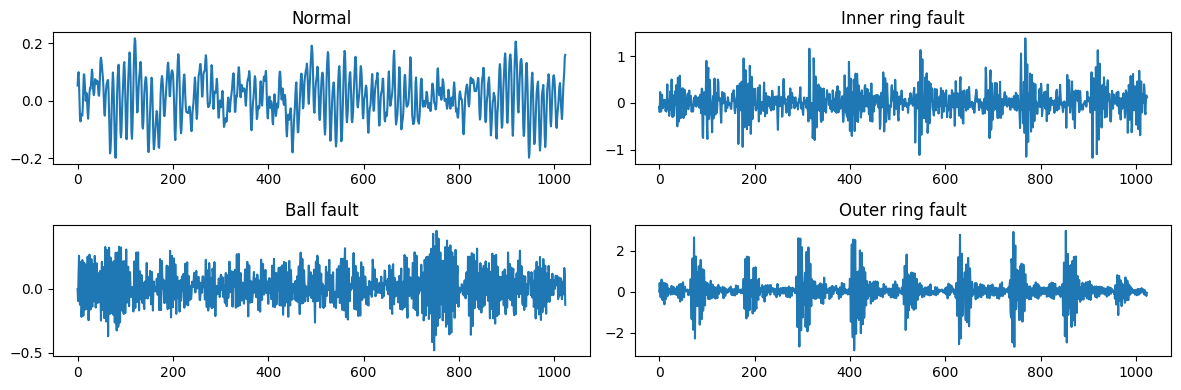

In [ ]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np

def get_signal(mat):
    for key in mat.keys():
        if 'DE_time' in key:
            return mat[key].squeeze()
        if 'X097_DE_time' in key:
            return mat[key].squeeze()
        if 'X105_DE_time' in key:
            return mat[key].squeeze()
        if 'X118_DE_time' in key:
            return mat[key].squeeze()
        if 'X130_DE_time' in key:
            return mat[key].squeeze()
    raise ValueError("DE_time signal not found in file.")

normal = get_signal(data)
inner  = get_signal(data1)
ball  = get_signal(data2)
outer  = get_signal(data3)

N = 1024
normal = normal[:N]
inner  = inner[:N]
ball   = ball[:N]
outer = outer[:N]

plt.figure(figsize=(12,4))

plt.subplot(2,2,1)
plt.plot(normal)
plt.title("Normal")

plt.subplot(2,2,2)
plt.plot(inner)
plt.title("Inner ring fault")

plt.subplot(2,2,3)
plt.plot(ball)
plt.title("Ball fault")

plt.subplot(2,2,4)
plt.plot(outer)
plt.title("Outer ring fault")

plt.tight_layout()
plt.show()

**Windows Segmentation**

In [ ]:
from scipy.io import loadmat
import pandas as pd
import numpy as np

mat_data = loadmat('Normal.mat')
normal_de_time = mat_data['X097_DE_time'].reshape(-1, 1)
mat_data1 = loadmat('Inner.mat')
inner_de_time = mat_data1['X105_DE_time'].reshape(-1, 1)
mat_data2 = loadmat('Ball.mat')
ball_de_time = mat_data2['X118_DE_time'].reshape(-1, 1)
mat_data3 = loadmat('Outer.mat')
outer_de_time = mat_data3['X130_DE_time'].reshape(-1, 1)

def segment_data(data, label, window_size = 2048):
    segments = []
    labels = []
    num_segments = len(data) // window_size
    for i in range(num_segments):
      labels.append(label)
      start = i * window_size
      end = start + window_size
      segments.append(data[start:end])
    return np.array(segments).reshape(num_segments, window_size), np.array(labels)

print(f"Data Segmentations in Normal: {segment_data(normal_de_time, label=0)}")
print(f"\nData Segmentations in Inner: {segment_data(inner_de_time, label=1)}")
print(f"\nData Segmentations in Ball: {segment_data(ball_de_time, label=2)}")
print(f"\nData Segmentations in Outer: {segment_data(outer_de_time, label=3)}")

Data Segmentations in Normal: (array([[ 0.05319692,  0.08866154,  0.09971815, ...,  0.00020862,
        -0.02190462, -0.07113785],
       [-0.09554585, -0.09137354, -0.05653477, ...,  0.15520985,
         0.16856123,  0.14665662],
       [ 0.06571385, -0.03170954, -0.089496  , ...,  0.03984554,
         0.05611754,  0.04756431],
       ...,
       [ 0.07843938,  0.08219446,  0.09512862, ...,  0.00250338,
         0.03337846,  0.04819015],
       [ 0.06529662,  0.06487938,  0.05882954, ..., -0.05862092,
        -0.07072062, -0.05173662],
       [-0.02586831, -0.01168246,  0.00166892, ...,  0.00438092,
        -0.06154154, -0.10889723]]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

**Feature Extraction**

In [ ]:
def extract_features(segments):
    X = segments
    features = {
        'rms': np.sqrt(np.mean(X**2, axis=1)).flatten(),
        'mean_abs': np.mean(X, axis=1).flatten(),
        'std': np.std(X, axis=1).flatten(),
        'kurtosis': pd.Series(X.flatten()).kurt(),
        'skewness': pd.Series(X.flatten()).skew()
    }
    return pd.DataFrame(features)

X_normal_seg, y_normal_seg = segment_data(normal_de_time, label=0)
normal_features = extract_features(X_normal_seg)

X_inner_seg, y_inner_seg = segment_data(inner_de_time, label=1)
inner_features = extract_features(X_inner_seg)

X_ball_seg, y_ball_seg = segment_data(ball_de_time, label=2)
ball_features = extract_features(X_ball_seg)

X_outer_seg, y_outer_seg = segment_data(outer_de_time, label=3)
outer_features = extract_features(X_outer_seg)

print("Features extracted from Normal:", normal_features.shape)
print("\n Features extracted from Inner:", inner_features.shape)
print("\n Features extracted from Ball:", ball_features.shape)
print("\n Features extracted from Outer:", outer_features.shape)

Features extracted from Normal: (119, 5)

 Features extracted from Inner: (59, 5)

 Features extracted from Ball: (59, 5)

 Features extracted from Outer: (59, 5)


**Combining Features and all datasets together**

In [ ]:
import numpy as np
import pandas as pd

normal_features = extract_features(X_normal_seg)
inner_features = extract_features(X_inner_seg)
ball_features = extract_features(X_ball_seg)
outer_features = extract_features(X_outer_seg)

X = np.concatenate([normal_features, inner_features, ball_features, outer_features], axis=0)
y = np.concatenate([y_normal_seg, y_inner_seg, y_ball_seg, y_outer_seg], axis=0)

print("Combined data shape:", X)

Combined data shape: [[ 0.07325645  0.01200496  0.07226609 -0.23562212 -0.03516836]
 [ 0.07903501  0.01279022  0.07799322 -0.23562212 -0.03516836]
 [ 0.07433775  0.01195882  0.07336953 -0.23562212 -0.03516836]
 ...
 [ 0.66418997  0.01761148  0.66395643  4.64941461  0.05638872]
 [ 0.66188194  0.01626037  0.66168218  4.64941461  0.05638872]
 [ 0.68737894  0.01571845  0.6871992   4.64941461  0.05638872]]


**shuffling**

In [ ]:
from sklearn.utils import shuffle
import numpy as np
import pandas as pd

X1, y = shuffle(X, y)

print(f"Shuffled data: {X1.shape[0]}")

Shuffled data: 296


**Split into train and test datasets**

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X1, y, random_state=42)

In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (222, 5)
Shape of X_test: (74, 5)
Shape of y_train: (222,)
Shape of y_test: (74,)


**Before Standardization**

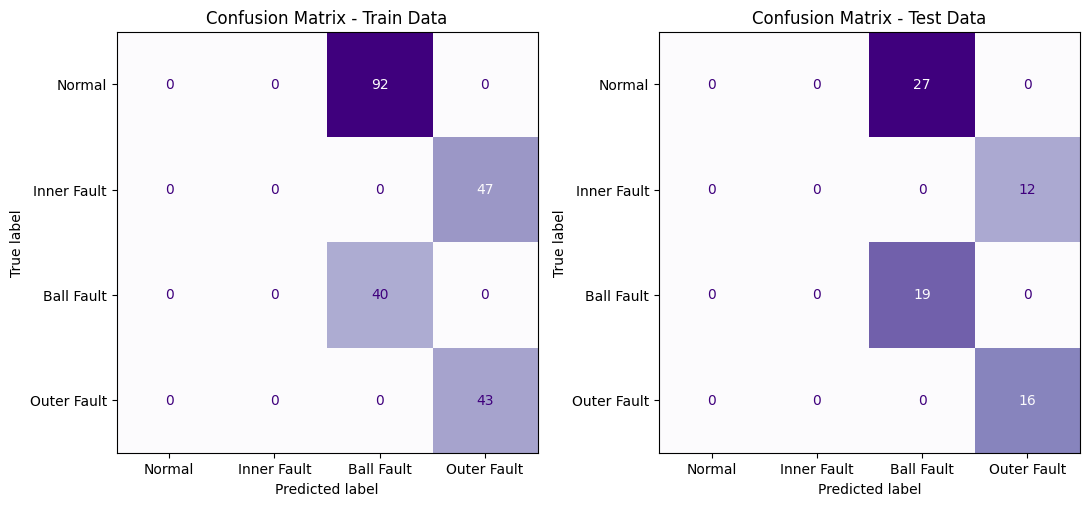

Total segments in training set: 222
Total segments in test set: 74


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred_train = svc_model.predict(X_train)
y_pred_test = svc_model.predict(X_test)

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

labels = ['Normal', 'Inner Fault', 'Ball Fault', 'Outer Fault']

fig, axes = plt.subplots(1, 2, figsize=(11, 6))

disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=labels)
disp_train.plot(cmap=plt.cm.Purples, ax=axes[0], colorbar=False)
axes[0].set_title("Confusion Matrix - Train Data")

disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=labels)
disp_test.plot(cmap=plt.cm.Purples, ax=axes[1], colorbar=False)
axes[1].set_title("Confusion Matrix - Test Data")
plt.tight_layout()
plt.show()

print("Total segments in training set:", len(y_train))
print("Total segments in test set:", len(y_test))

**Accuracy**

In [ ]:
svc_model.fit(X_train, y_train)
accuracy_wt = svc_model.score(X_test, y_test)
print("Accuracy:", accuracy_wt)
print("Accuracy (%):", accuracy_wt * 100)

Accuracy: 0.7432432432432432
Accuracy (%): 74.32432432432432


**Implementing Standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(X_train)
pd.DataFrame(train_data_scaled).describe()

,0,1,2,3,4
count,2.220000e+02,2.220000e+02,2.220000e+02,2.220000e+02,2.220000e+02
mean,-3.370677e-16,-1.091219e-15,3.370677e-16,-1.440289e-15,3.040611e-16
std,1.002260e+00,1.002260e+00,1.002260e+00,1.002260e+00,1.002260e+00
min,-7.930333e-01,-1.238030e+00,-7.940077e-01,-7.988317e-01,-8.350907e-01
25%,-7.753995e-01,-5.619619e-01,-7.766279e-01,-7.988317e-01,-8.350907e-01
50%,-4.897058e-01,-3.333858e-01,-4.885993e-01,-6.902914e-01,-5.006779e-01
75%,2.092847e-01,-1.043533e-02,2.110401e-01,5.651623e-01,3.486555e-01
max,2.101435e+00,3.762821e+00,2.101430e+00,1.733524e+00,1.741772e+00


In [ ]:
test_data_scaled = scaler.transform(X_test)
pd.DataFrame(test_data_scaled).describe()

,0,1,2,3,4
count,74.000000,74.000000,74.000000,74.000000,74.000000
mean,0.033961,-0.052816,0.034102,-0.002239,-0.075413
std,1.037055,0.899593,1.037037,1.034986,0.918019
min,-0.791686,-1.297928,-0.793262,-0.798832,-0.835091
25%,-0.774028,-0.580286,-0.774459,-0.798832,-0.835091
50%,-0.474342,-0.318086,-0.473068,-0.690291,-0.500678
75%,0.205491,0.013373,0.207258,0.565162,0.348655
max,2.025653,3.775390,2.024954,1.733524,1.741772


**Classification Model**

In [ ]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(train_data_scaled, y_train)

SVC()

**After standardization Confusion Matrix**

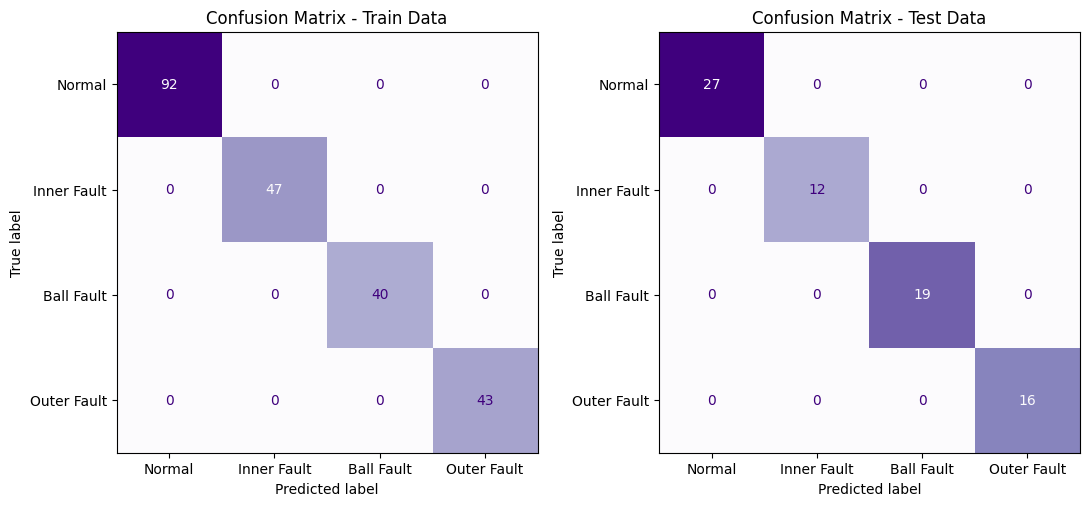

Total segments in training set: 222
Total segments in test set: 74


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred_train = svc_model.predict(train_data_scaled)
y_pred_test = svc_model.predict(test_data_scaled)

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

labels = ['Normal', 'Inner Fault', 'Ball Fault', 'Outer Fault']

fig, axes = plt.subplots(1, 2, figsize=(11, 6))

disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=labels)
disp_train.plot(cmap=plt.cm.Purples, ax=axes[0], colorbar=False)
axes[0].set_title("Confusion Matrix - Train Data")

disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=labels)
disp_test.plot(cmap=plt.cm.Purples, ax=axes[1], colorbar=False)
axes[1].set_title("Confusion Matrix - Test Data")
plt.tight_layout()
plt.show()

print("Total segments in training set:", len(y_train))
print("Total segments in test set:", len(y_test))

**Accuracy**

In [ ]:
svc_model.fit(train_data_scaled, y_train)
accuracy = svc_model.score(test_data_scaled, y_test)
print("Accuracy:", accuracy)
print("Accuracy (%):", accuracy * 100)

Accuracy: 1.0
Accuracy (%): 100.0


**Classification Report**

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(
    y_test,
    y_pred_test,
    target_names=['Normal', 'Inner Fault', 'Ball Fault', 'Outer Fault'],
    output_dict=True
)

df = pd.DataFrame(report).transpose()

df = df.drop(['accuracy', 'macro avg', 'weighted avg'])
print("Classification Report:\n")
print(df)

Classification Report:

             precision  recall  f1-score  support
Normal             1.0     1.0       1.0     27.0
Inner Fault        1.0     1.0       1.0     12.0
Ball Fault         1.0     1.0       1.0     19.0
Outer Fault        1.0     1.0       1.0     16.0


**Visualize Measured Times**

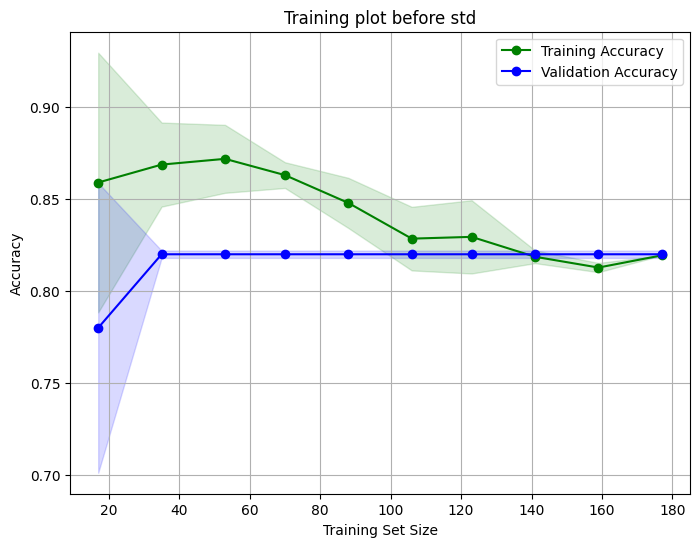

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

svc_model.fit(X_train, y_train)
train_sizes, train_scores, test_scores = learning_curve(
    svc_model,
    X_train,
    y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color='green', label='Training Accuracy')
plt.plot(train_sizes, test_mean, 'o-', color='blue', label='Validation Accuracy')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,
                 alpha=0.15, color='green')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std,
                 alpha=0.15, color='blue')

plt.title("Training plot before std")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(loc="best")
plt.show()


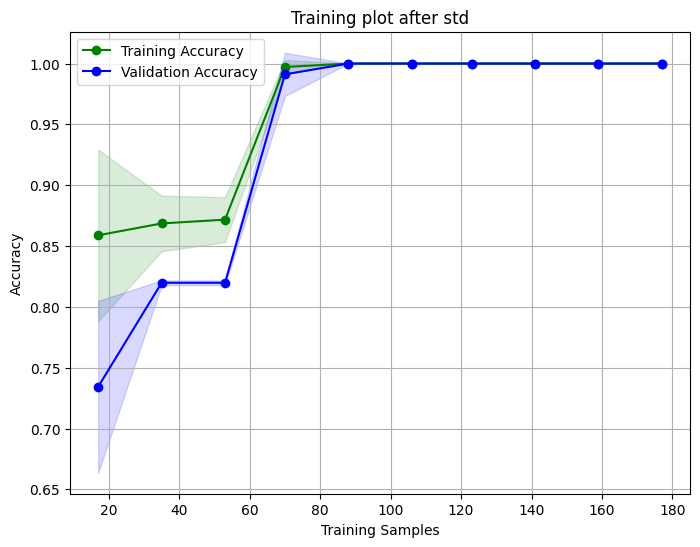

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    svc_model,
    train_data_scaled,
    y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
test_mean  = np.mean(test_scores, axis=1)
test_std   = np.std(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', color='green', label='Training Accuracy')
plt.plot(train_sizes, test_mean, 'o-', color='blue', label='Validation Accuracy')

plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.15, color='green')
plt.fill_between(train_sizes, test_mean-test_std,   test_mean+test_std,   alpha=0.15, color='blue')

plt.title("Training plot after std")
plt.xlabel("Training Samples")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(loc="best")
plt.show()


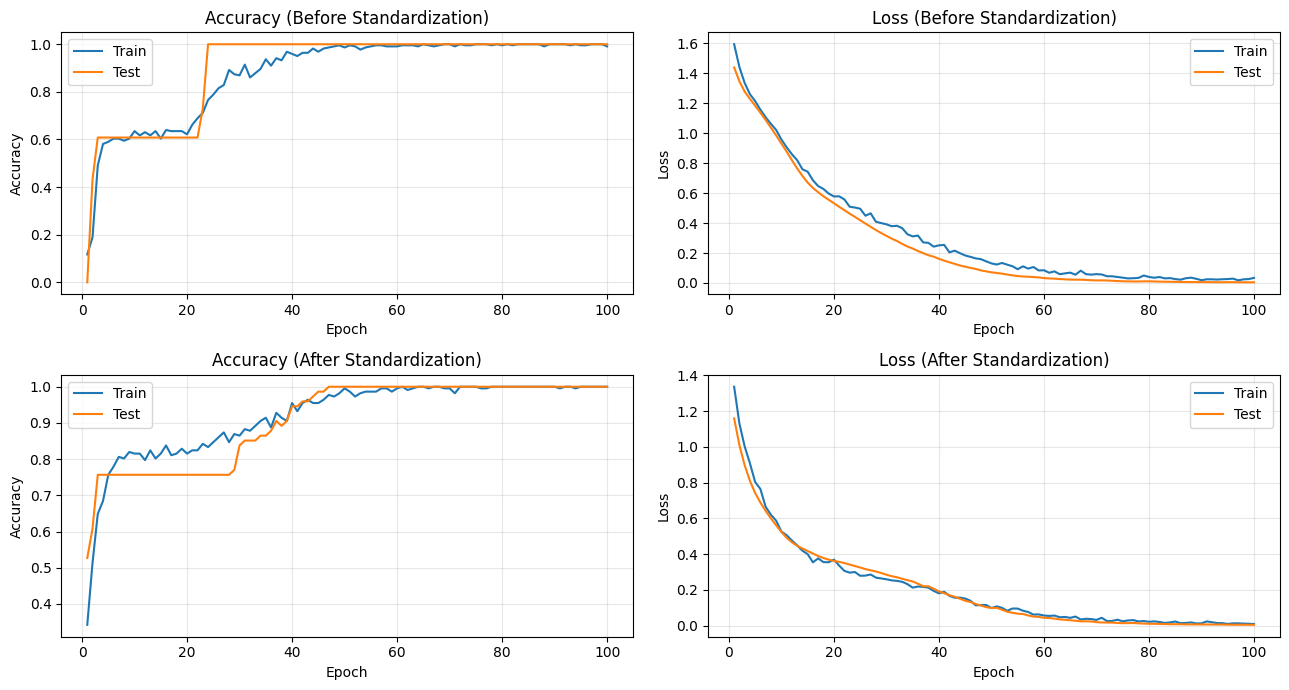

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

epochs = range(1, 101)

fig, axes = plt.subplots(2, 2, figsize=(13, 7))

axes[0, 0].plot(epochs, history_raw.history['accuracy'], label='Train')
axes[0, 0].plot(epochs, history_raw.history['val_accuracy'], label='Test')
axes[0, 0].set_title("Accuracy (Before Standardization)")
axes[0, 0].set_xlabel("Epoch")
axes[0, 0].set_ylabel("Accuracy")
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend()

axes[0, 1].plot(epochs, history_raw.history['loss'], label='Train')
axes[0, 1].plot(epochs, history_raw.history['val_loss'], label='Test')
axes[0, 1].set_title("Loss (Before Standardization)")
axes[0, 1].set_xlabel("Epoch")
axes[0, 1].set_ylabel("Loss")
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].legend()

axes[1, 0].plot(epochs, history_std.history['accuracy'], label='Train')
axes[1, 0].plot(epochs, history_std.history['val_accuracy'], label='Test')
axes[1, 0].set_title("Accuracy (After Standardization)")
axes[1, 0].set_xlabel("Epoch")
axes[1, 0].set_ylabel("Accuracy")
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].legend()

axes[1, 1].plot(epochs, history_std.history['loss'], label='Train')
axes[1, 1].plot(epochs, history_std.history['val_loss'], label='Test')
axes[1, 1].set_title("Loss (After Standardization)")
axes[1, 1].set_xlabel("Epoch")
axes[1, 1].set_ylabel("Loss")
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].legend()

plt.tight_layout()
plt.show()